In [2]:
%matplotlib inline

import matplotlib.pyplot as plt

import pandas as pd

In [3]:
from sklearn.datasets.california_housing import fetch_california_housing
housing=fetch_california_housing()
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [4]:
housing.data.shape

(20640, 8)

In [5]:
housing.data[0]

array([   8.3252    ,   41.        ,    6.98412698,    1.02380952,
        322.        ,    2.55555556,   37.88      , -122.23      ])

In [7]:
from sklearn import tree
dtr=tree.DecisionTreeRegressor(max_depth=2)
dtr.fit(housing.data[:,[6,7]],housing.target)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [8]:
dot_data=\
    tree.export_graphviz(
    dtr,
    out_file=None,
    feature_names=housing.feature_names[6:8],
    filled=True,
    impurity=False,
    rounded=True
)

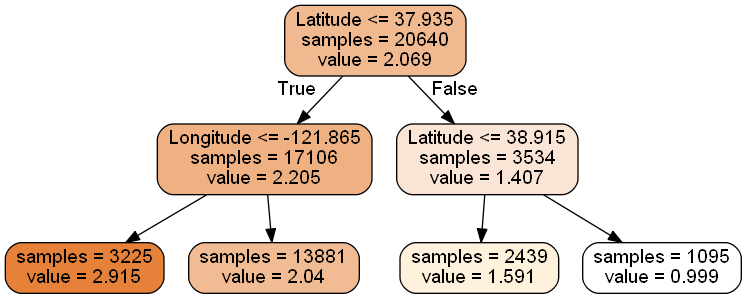

In [15]:
import pydotplus
import os
os.environ["PATH"]+=os.pathsep+'D:/python/release/bin/'
graph=pydotplus.graph_from_dot_data(dot_data)
graph.get_nodes()[7].set_fillcolor("#FFF2DD")
from IPython.display import Image
Image(graph.create_png())

In [16]:
graph.write_png("dtr_while_background.png")

True

In [18]:
from sklearn.model_selection import train_test_split
data_train,data_test,target_train,target_test=\
    train_test_split(housing.data,housing.target,test_size=0.1,random_state=42)
dtr=tree.DecisionTreeRegressor(random_state=42)
dtr.fit(data_train,target_train)
dtr.score(data_test,target_test)

0.637355881715626

In [21]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=42)
rfr.fit(data_train,target_train)
rfr.score(data_test,target_test)

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7910601348350835

In [27]:
from sklearn.model_selection import GridSearchCV
tree_param_grid={'min_samples_split':[3,6,9],'n_estimators':[10,50,100]}
grid=GridSearchCV(RandomForestRegressor(),param_grid=tree_param_grid,cv=5)
grid.fit(data_train,target_train)
grid.best_params_,grid.best_score_

({'min_samples_split': 3, 'n_estimators': 100}, 0.8068483732468088)